### 4.3 map

In [31]:
import pandas as pd
raw_total = pd.read_excel('./data/jeju_crawling_raw.xlsx')
raw_total.head()

Unnamed: 0                                            content        date  \
0           0  (광고)지만 찐로컬맛집!!제주도민들의 흑돼지픽🎯'한라축산정육식당'🙏착한가격에 신선함...  2020-10-06   
1           1  산도롱1오늘 뭐먹지 고민이신분산도롱맨도롱으로 🍜모두모두 모이세요!100% 도가니 육...  2020-10-07   
2           4  광고★성산일출봉이 다보여!성산일출봉도 보이고성산일출봉 파도소리도 드리고2인49,00...  2020-10-06   
3           5  제주 유일무이 고기국수 맛집🍜100%도가니 육수를 우려 깊은맛이 일품!!호로록 한입...  2020-10-05   
4           6  제주도맛집 검색하다 찾은 대박맛집!.제주도 "오전 열한시".다른분께서 리뷰하신거 보...  2020-10-07   

    like place                                               tags  
0      0   NaN  ['#제주흑돼지맛집', '#제주도흑돼지맛집', '#제주시맛집', '#제주공항근처맛집...  
1      0   NaN  ['#제주도맛집', '#제주맛집', '#제주도고기국수', '#성산맛집', '#광치기...  
2  1,174   NaN  ['#제주맛집', '#제주도맛집', '#성산맛집', '#서귀포맛집', '#성산일출봉...  
3  1,256   NaN  ['#제주도맛집', '#제주맛집', '#제주도고기국수', '#성산일출봉맛집', '#...  
4      0   NaN  ['#광고입니다', '#서귀포맛집', '#중문맛집', '#제주도맛집', '#제주맛집...

In [32]:
# 위치 정보 가져오기
location_counts = raw_total['place'].value_counts()
location_counts

Jeju                                  54
제주도                                   40
Jeju-do                               39
환상의 섬 Jeju Island                     15
제주 협재 해수욕장                            10
푸른섬 제주도                                9
Jeju Island                            9
제주도 Jeju Island                        9
Seogwipo                               8
제주도 애월읍                                8
제주도 곽지해수욕장                             7
안돌오름                                   7
고래배꼽                                   7
모알보알                                   6
Seogwipo, Jeju Island, South Korea     5
The Shilla Jeju                        5
한담해안산책로                                4
Cafè 새빌                                4
새별오름                                   4
금악오름                                   4
Jeju Island, South Korea - 제주도         4
사이카레                                   4
제주 아침미소목장                              3
Gwangju                                3
카페 마노르블랑 제주     

In [33]:
# 등록된 위치 정보별 빈도수 데이터 -> dataframe 변환
location_counts_df = pd.DataFrame(location_counts)
location_counts_df.head()

place
Jeju                  54
제주도                   40
Jeju-do               39
환상의 섬 Jeju Island     15
제주 협재 해수욕장            10

In [34]:
# 위치 정보의 빈도수 데이터 저장
location_counts_df.to_excel('./data/jeju_location_counts.xlsx')

In [35]:
# 위치 정보의 종류 확인
locations = list(location_counts.index)
locations

['Jeju',
 '제주도',
 'Jeju-do',
 '환상의 섬 Jeju Island',
 '제주 협재 해수욕장',
 '푸른섬 제주도',
 'Jeju Island',
 '제주도 Jeju Island',
 'Seogwipo',
 '제주도 애월읍',
 '제주도 곽지해수욕장',
 '안돌오름',
 '고래배꼽',
 '모알보알',
 'Seogwipo, Jeju Island, South Korea',
 'The Shilla Jeju',
 '한담해안산책로',
 'Cafè 새빌',
 '새별오름',
 '금악오름',
 'Jeju Island, South Korea - 제주도',
 '사이카레',
 '제주 아침미소목장',
 'Gwangju',
 '카페 마노르블랑 제주',
 '제주귀더크',
 '아카렌가',
 '이호테우해변',
 '도두해안도로',
 'D&department JEJU by Arario',
 '한림공원 Hallimpark',
 '용눈이오름',
 '용머리해안',
 '제주 함덕 서우봉 해변',
 'One and only - 원앤온리 제주',
 '월정리해변',
 '제주시민속오일시장',
 '사려니숲길',
 '그계절',
 '광치기해변',
 '제주 서귀포',
 '미남미녀',
 '마녀상회',
 'Jeju901',
 '곱을락연어',
 '산방산근처',
 "협재화덕 도나토스_Donato's",
 '서귀다원',
 '금능해수욕장',
 'Umu Pudding , 우무',
 '상효원 수목원',
 '우도',
 '허니문하우스',
 '제주김만복',
 '젬스톤',
 '합정 어딘가',
 '하이엔드 제주',
 '오후새우시',
 '제주신화월드 Jeju Shinhwa World',
 '우도 牛岛 Udo Island, South Korea',
 '북촌에 가면',
 '섭지코지 (Seopjikoji)',
 '함덕해수욕장',
 '애월해안도로',
 '서귀포 치유의 숲',
 'Hidden Cliff / 히든 클리프',
 '울트라마린',
 '도두봉',
 '모뉴에트',
 '88 Burger',
 '큰엉해안경승지',
 '제주맛

> 카카오 검색 API

In [36]:
# 사용 예시
import requests

searching = '합정 스타벅스'
url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)
headers = {
    "Authorization": "KakaoAK 카카오API키입력자리"  # 카카오 API키 입력
}
places = requests.get(url, headers = headers).json()['documents']
# requests.get()으로 url 주소에 정보를 요청(headers에 저장된 아이디와 패스워드를 함께 전달)
# 요청 받은 후 결과를 json 형태로 불러옴
# documents 항목의 값을 선택함

places

[{'address_name': '서울 마포구 서교동 395-166',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '26572121',
  'phone': '',
  'place_name': '스타벅스 서교점',
  'place_url': 'http://place.map.kakao.com/26572121',
  'road_address_name': '서울 마포구 양화로 78',
  'x': '126.916980454434',
  'y': '37.5514601750423'},
 {'address_name': '서울 마포구 합정동 472',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '2057327896',
  'phone': '1522-3232',
  'place_name': '스타벅스 합정점',
  'place_url': 'http://place.map.kakao.com/2057327896',
  'road_address_name': '서울 마포구 월드컵로1길 14',
  'x': '126.91211392586314',
  'y': '37.54981773755399'},
 {'address_name': '서울 마포구 서교동 490',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '288597324',
  'phone': '',
  'place_name': '스타벅스 합정폴리스R

In [37]:
# 장소 검색 함수 만들기
def find_places(searching):
    
    # 1. 접속 url 만들기
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)
    
    # 2. headers 입력하기
    headers = {
    "Authorization": "KakaoAK 카카오API키입력자리"  # 카카오 API키 입력
    }
    
    # 3. API 요청 & 정보 받기
    places = requests.get(url, headers = headers).json()['documents']
    
    # 4. 필요한 정보 선택하기
    place = places[0] 
    name = place['place_name']
    x=place['x']
    y=place['y']
    data = [name, x, y, searching]  # 지도상의 명칭, 경도, 위도, 검색어

    return data

In [38]:
# 제주공항 검색 예
data = find_places('제주공항')
data

['제주국제공항', '126.492769004244', '33.5070789578184', '제주공항']

In [39]:
# 인스타그램 위치명에 대한 위치정보 검색
from tqdm import tqdm_notebook  # 검색 시 현재 작업 진행상황 확인 
import time
locations_inform = [] 
for location in tqdm_notebook(locations):
    try:
        data = find_places(location)
        locations_inform.append(data)
        time.sleep(0.5)
    except:
        pass
locations_inform

/Users/nani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


[['Jeju in aA', '126.83650369902168', '33.53833652360498', 'Jeju'],
 ['제주도', '126.545875710283', '33.3797769227161', '제주도'],
 ['협재해수욕장', '126.239157539085', '33.3938660776221', '제주 협재 해수욕장'],
 ['푸른섬게스트하우스', '126.812424476454', '33.3079427982969', '푸른섬 제주도'],
 ['제주도', '126.545875710283', '33.3797769227161', 'Jeju Island'],
 ['제주도', '126.545875710283', '33.3797769227161', '제주도 Jeju Island'],
 ['서귀포잠수함', '126.558616052674', '33.2393033784206', 'Seogwipo'],
 ['올레길 17코스(광령-제주원도심 올레)', '126.439341083568', '33.4608856490895', '제주도 애월읍'],
 ['곽지해수욕장', '126.304673157235', '33.4506575078278', '제주도 곽지해수욕장'],
 ['안돌오름', '126.755820481231', '33.4578484860019', '안돌오름'],
 ['고래배꼽', '126.403430604615', '33.4804484298816', '고래배꼽'],
 ['카페모알보알제주', '126.727953094591', '33.5595665887276', '모알보알'],
 ['한담해안산책로', '126.310468326159', '33.4593234504188', '한담해안산책로'],
 ['새별오름', '126.357711941768', '33.3661936453469', '새별오름'],
 ['금오름', '126.305717639727', '33.3545500138779', '금악오름'],
 ['사이카레', '126.381106668339', '33

In [40]:
# 위치 정보 저장
locations_inform_df = pd.DataFrame(locations_inform)
locations_inform_df.columns = ['name_official', '경도', '위도', '인스타위치명']
locations_inform_df.to_excel('./data/jeju_locations.xlsx', index=False)

> 위치 정보별 인스타 게시량 정리

In [41]:
location_counts_df = pd.read_excel('./data/jeju_location_counts.xlsx', index_col=0)
locations_inform_df = pd.read_excel('./data/jeju_locations.xlsx')

In [42]:
# 위치 데이터 병합
location_data = pd.merge(locations_inform_df, location_counts_df,
                        how = 'inner', left_on = 'name_official', right_index = True)
# inner: 양쪽에 모두 있는 데이터만 포함
# left_on: 왼쪽에 위치한 locations_inform_df에서 name_official을 기준으로 병합
# right_index: 오른쪽에 위치한 location_counts_df에서는 인덱스 기준으로 병합

location_data.head()

name_official          경도         위도           인스타위치명  place
1            제주도  126.545876  33.379777              제주도     40
4            제주도  126.545876  33.379777      Jeju Island     40
5            제주도  126.545876  33.379777  제주도 Jeju Island     40
82           제주도  126.545876  33.379777      Jeju-Island     40
8         곽지해수욕장  126.304673  33.450658       제주도 곽지해수욕장      2

In [43]:
location_data.to_excel('./data/jeju_location_inform.xlsx', index = False)

> folium을 이용한 지도 시각화(개별 표시)

In [44]:
location_data = pd.read_excel('./data/jeju_location_inform.xlsx')
location_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 5 columns):
name_official    171 non-null object
경도               171 non-null float64
위도               171 non-null float64
인스타위치명           171 non-null object
place            171 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 6.8+ KB


In [49]:
# 지도 표시
import folium

Mt_Hanla = [33.362500, 126.533694]  # 한라산 좌표 중심
map_jeju = folium.Map(location = Mt_Hanla, zoom_start = 11)

for i in range(len(location_data)):
    name = location_data['name_official'][i]  # 공식명칭
    count = location_data['place'][i]  # 게시글 갯수
    size = int(count)*2
    long = float(location_data['위도'][i])
    lat = float(location_data['경도'][i])
    folium.CircleMarker((long, lat), radius = size, color = 'red', popup = name).add_to(map_jeju)
    # 원을 생성함: 원 위치(경도, 위도), 크기, 색상, 원 이름 등 정보 지정
    # 원을 map_jeju 지도에 추가함
    
map_jeju

In [46]:
# 지도 저장
map_jeju.save('./data/jeju.html')

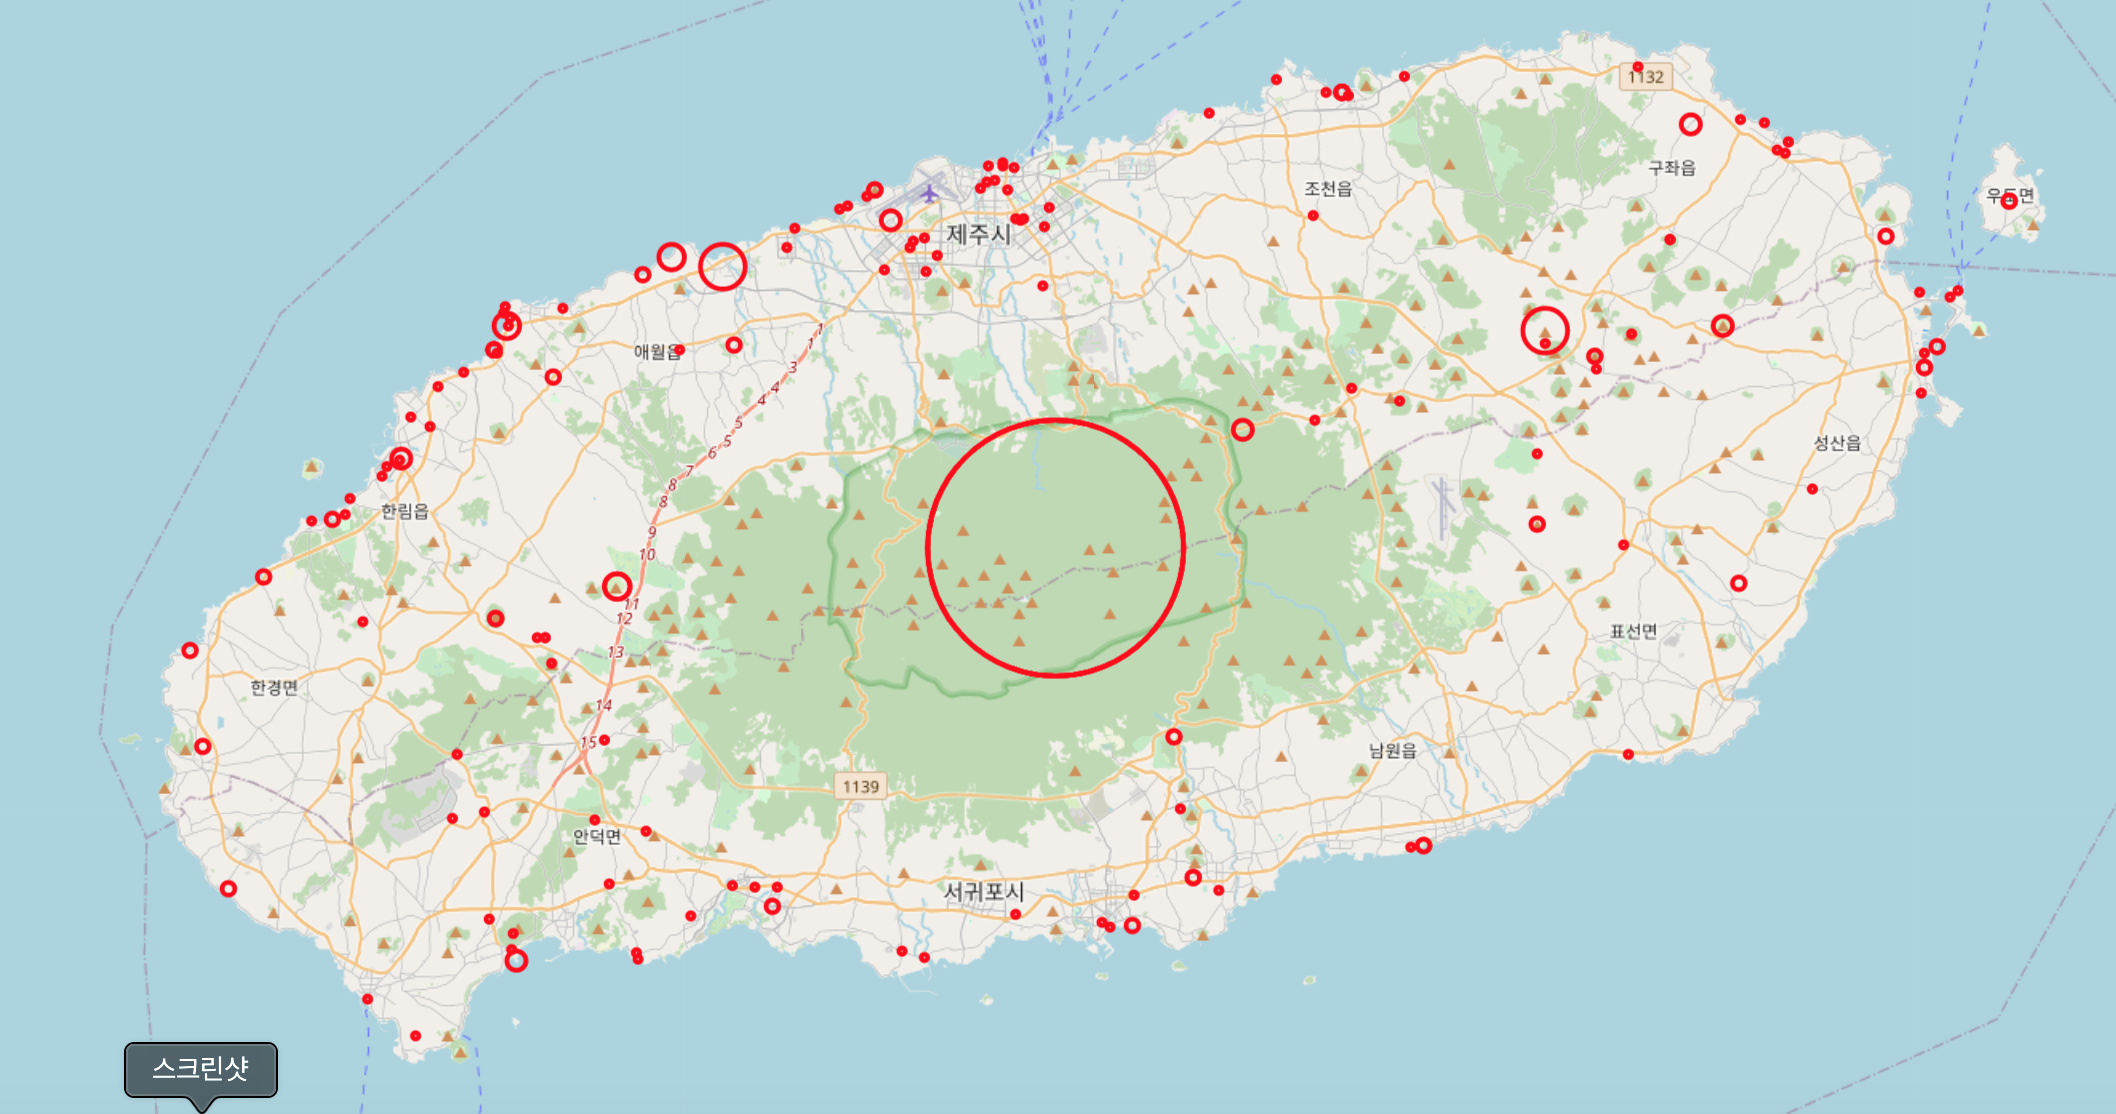

In [52]:
from IPython.display import Image

Image("./data/jeju.png")

> folium을 이용한 지도 시각화(그룹 표시)

In [47]:
from folium.plugins import MarkerCluster

locations = []
names = []

for i in range(len(location_data)):
    data = location_data.iloc[i]  # 행 하나씩
    locations.append((float(data['위도']), float(data['경도'])))  # 위도, 경도 순으로
    names.append(data['name_official'])
    
icon_create_function = """
function(cluster){
    return L.divIcon({
    html: '<b>' + cluster.getChildCount() + '</b>',
    className: 'marker-cluster marker-cluster-large',
    iconSize: new L.Point(30, 30)
    }); 
}
"""

Mt_Hanla = [33.362500, 126.533694]  # 한라산 좌표 중심
map_jeju2 = folium.Map(location = Mt_Hanla, zoom_start = 11)

marker_cluster = MarkerCluster(
    locations = locations, popups = names, 
    name = 'Jeju', 
    overlay = True, 
    control = True,
    icon_create_function = icon_create_function
)

marker_cluster.add_to(map_jeju2)
folium.LayerControl().add_to(map_jeju2)

map_jeju2

In [48]:
# 지도 저장
map_jeju2.save('./data/jeju_cluster.html')

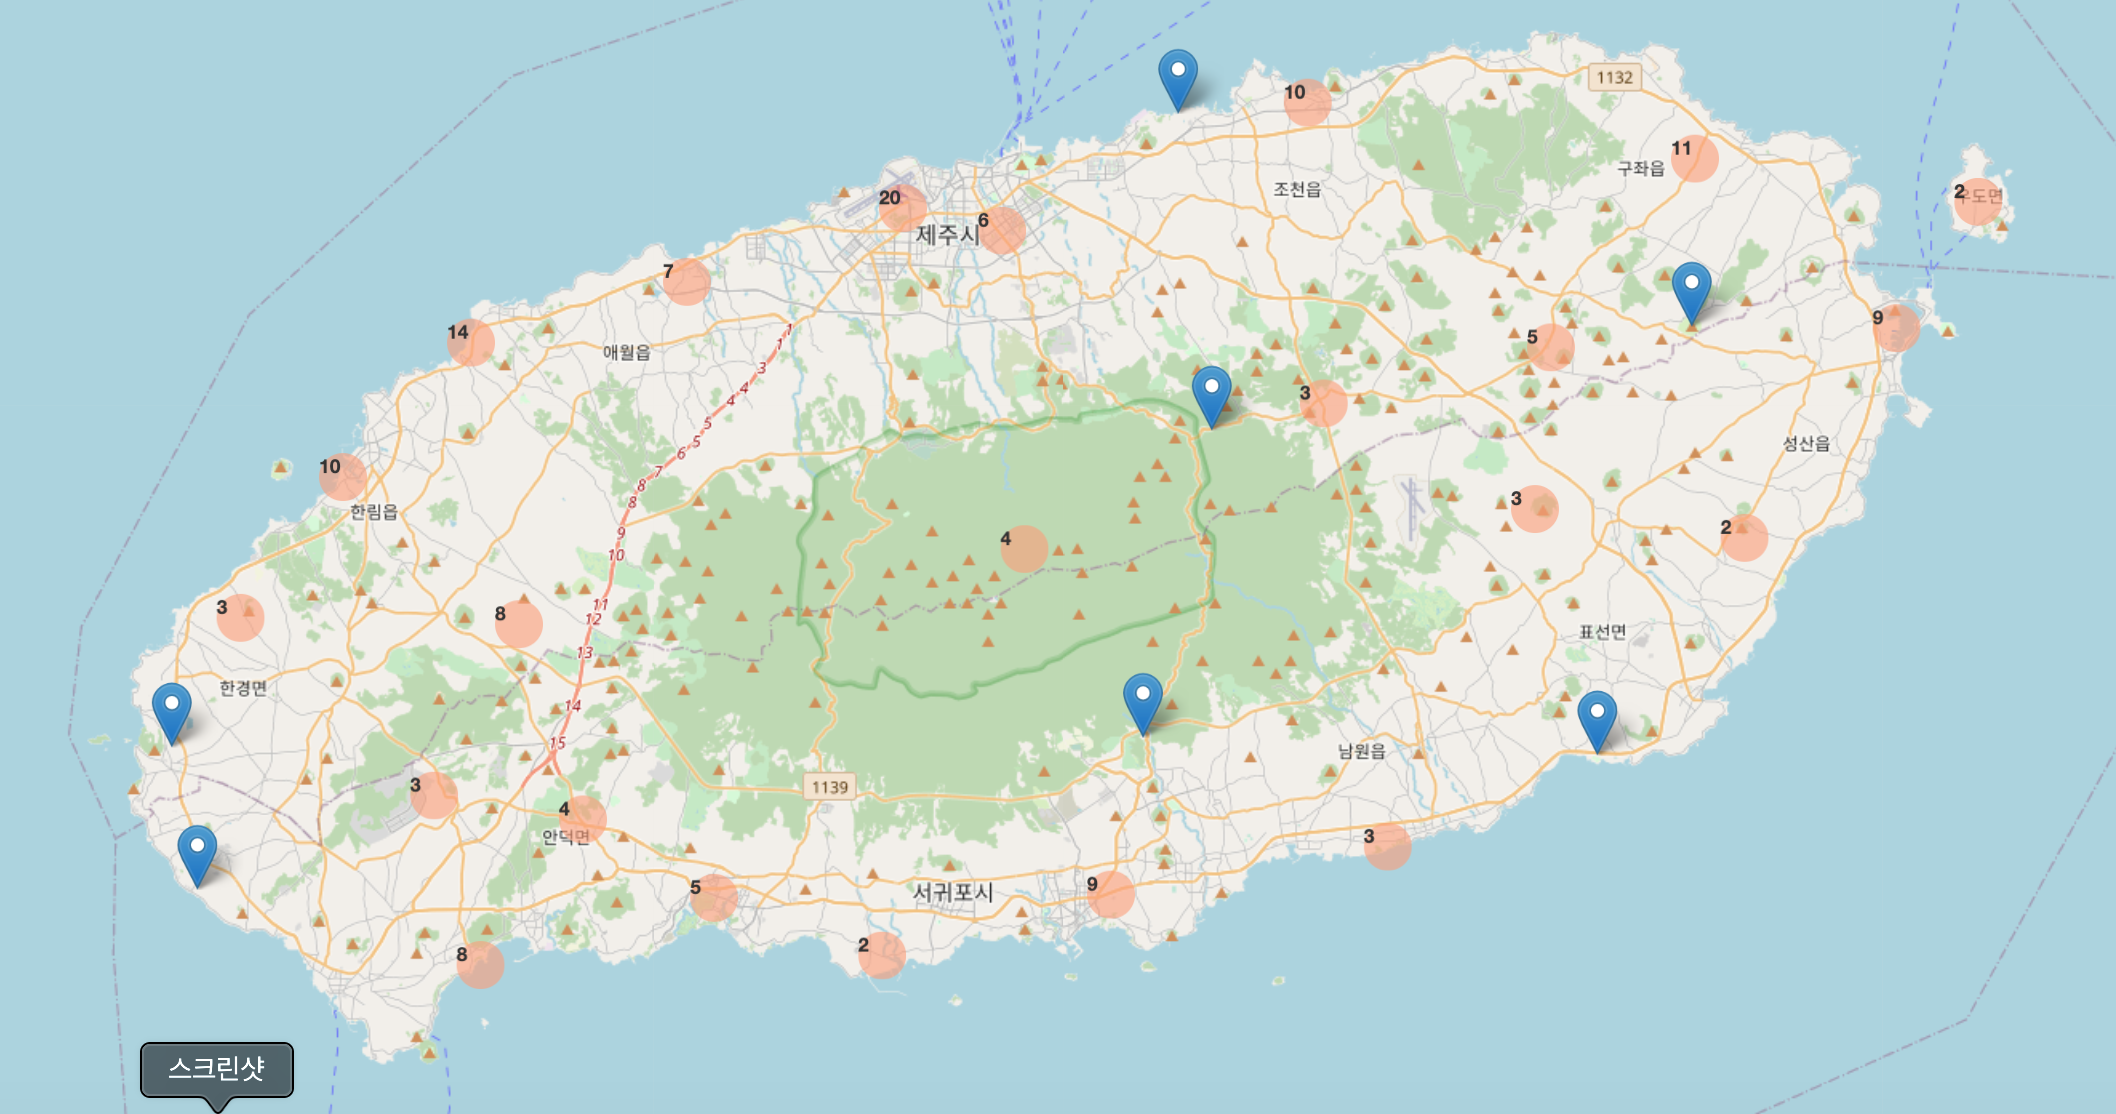

In [54]:
Image("./data/jeju_cluster.png")